In [1]:
import warnings
warnings.filterwarnings('ignore')

from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.models.efficientnet import *

In [2]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [3]:
stats = ([0.48746821, 0.48746821, 0.48746821], [0.24557937, 0.24557937, 0.24557937])

def valid_func(o):
    return 'test' in str(o)

def label_func(o):
    name = o.name
    if 'virus' in name:
        return 'virus'
    if 'bacteria' in name:
        return 'bacteria'
    return 'normal'

data = (ImageList.from_folder(data_path)
        .split_by_valid_func(valid_func)
        .label_from_func(label_func)
        .transform(get_transforms(), size=456)
        .databunch()
        .normalize(stats)
        )

data, data.classes

(ImageDataBunch;
 
 Train: LabelList (5232 items)
 x: ImageList
 Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456)
 y: CategoryList
 normal,normal,normal,normal,normal
 Path: /media/sm2/data/pneumonia/chest_xray;
 
 Valid: LabelList (624 items)
 x: ImageList
 Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456)
 y: CategoryList
 normal,normal,normal,normal,normal
 Path: /media/sm2/data/pneumonia/chest_xray;
 
 Test: None,
 ['bacteria', 'normal', 'virus'])

In [4]:
learn = cnn_learner(data, 
                    models.densenet201,
                    bn_wd=False,
                    metrics=error_rate,
                    loss_func=LabelSmoothingCrossEntropy(),
                    callback_fns=[BnFreeze,
                                  partial(SaveModelCallback, monitor='error_rate', name='best_error')
                                 ],
                    model_dir=model_path, 
                    ).to_fp16()

In [5]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.229247,0.950173,0.259615,01:35
1,0.874098,0.655981,0.161859,01:21
2,0.720319,0.635345,0.145833,01:21
3,0.648811,0.631667,0.158654,01:23
4,0.622064,0.629714,0.157051,01:22


Better model found at epoch 0 with error_rate value: 0.25961539149284363.
Better model found at epoch 1 with error_rate value: 0.16185897588729858.
Better model found at epoch 2 with error_rate value: 0.1458333283662796.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


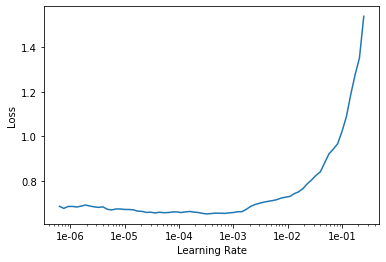

In [6]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [7]:
lr = 5e-4
learn.fit_one_cycle(5, slice(lr/30, lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.625171,0.702921,0.184295,01:34
1,0.622727,0.600311,0.134615,01:35
2,0.594681,0.610513,0.150641,01:34
3,0.550791,0.605247,0.153846,01:35
4,0.522963,0.610277,0.157051,01:35


Better model found at epoch 0 with error_rate value: 0.18429486453533173.
Better model found at epoch 1 with error_rate value: 0.13461539149284363.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


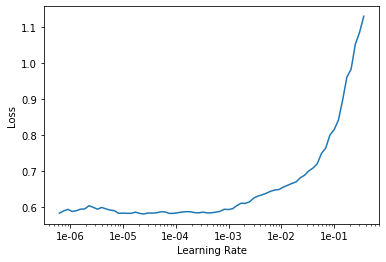

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
lr = 5e-4
learn.fit_one_cycle(25, slice(lr/30, lr), pct_start=0, final_div=1000)

epoch,train_loss,valid_loss,error_rate,time
0,0.599791,0.602210,0.142628,01:35
1,0.573522,0.631763,0.161859,01:36
2,0.552505,0.654002,0.177885,01:37
3,0.523751,0.601039,0.139423,01:36
4,0.494930,0.618017,0.145833,01:34
5,0.473510,0.638051,0.161859,01:35
6,0.448434,0.636972,0.174679,01:36
7,0.425524,0.654540,0.187500,01:36
8,0.410895,0.649260,0.184295,01:37
9,0.388933,0.603072,0.141026,01:36


Better model found at epoch 0 with error_rate value: 0.14262820780277252.
Better model found at epoch 3 with error_rate value: 0.13942307233810425.
